# Atmospheric CO2 Concentrations

The Atmospheric CO2 Concentrations dataset comprises measurements of the concentration of carbon dioxide in the atmosphere, expressed in parts per million (ppm). The data spans from March 1958 onwards, providing a long-term record of one of the greenhouse gases affecting Earth's climate. The dataset's monthly resolution allows for observing seasonal variations and long-term trends in CO2 concentrations. Sourced from the National Oceanic and Atmospheric Association (NOAA) Global Monitoring Laboratory, this dataset is a valuable resource in climate change research and environmental studies. 

In [45]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

In [46]:
dataset_name = "atmospheric_co2_concentrations"

In [47]:
input_fname = "Atmospheric_CO2_Concentrations.csv"
output_dir = f'./../../processed/{dataset_name}/'
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_fig_fname = os.path.join(output_dir, f'{dataset_name}.png')

# Read Data

In [48]:
data = pd.read_csv(input_fname)
data.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Date,Value
0,1,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M03,315.70
1,2,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M04,317.45
2,3,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M05,317.51
3,4,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M06,317.24
4,5,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M07,315.86


# Prepare Data

In [49]:
series_col = "Indicator"
epoch_col = 'Date'
epoch_label = "Date"
time_col = 'Date'
value_col = 'Value'
exog_cols = []

## Add Series Id

In [50]:
if series_col not in data:
    data.insert(0, series_col, 1)
data.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Date,Value
0,1,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M03,315.70
1,2,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M04,317.45
2,3,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M05,317.51
3,4,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M06,317.24
4,5,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M07,315.86


## Parse the 'Date' Column as DateTime

In [51]:
# To parse the 'Date' column as datetime in the format "yyyy-mm-dd", we'll replace the 'M' with a dash and then convert it.
data[epoch_col] = pd.to_datetime(data[epoch_col].str.replace('M', '-'), format='%Y-%m')
data.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Date,Value
0,1,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958-03-01,315.70
1,2,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958-04-01,317.45
2,3,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958-05-01,317.51
3,4,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958-06-01,317.24
4,5,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958-07-01,315.86


In [52]:
data.tail()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Date,Value
1561,1562,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2023-09-01,0.63
1562,1563,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2023-10-01,418.82
1563,1564,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2023-10-01,0.74
1564,1565,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2023-11-01,420.46
1565,1566,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2023-11-01,0.72


## Filter Data to Contain Unit = "Parts Per Million" 

In [53]:
# data contains two metrics
data["Unit"].unique()

array(['Parts Per Million', 'Percent'], dtype=object)

In [54]:
data = data[data["Unit"] == "Parts Per Million"]
data["Unit"].unique()

array(['Parts Per Million'], dtype=object)

In [55]:
data[epoch_col].nunique()

789

# Visualize Data

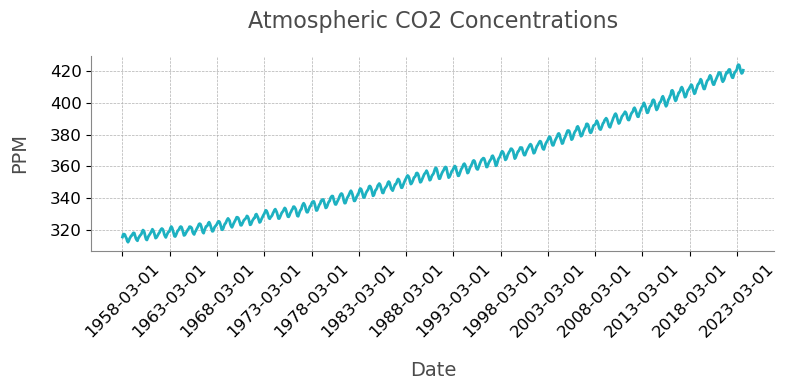

In [56]:
# Adjusting the spacing between axis titles and tick labels
plt.figure(figsize=(8, 4))

# Set title and labels with a medium contrast
font = {
#     'family': 'serif',
    'color':  '#4B4B4B',
    'weight': 'normal'
}

# Plotting the data
plt.plot(data[epoch_col], data[value_col], color='#1db1c1', linewidth=2)

# Adjusting the title and labels with increased spacing
plt.xlabel(epoch_col, fontsize=14, fontdict=font, labelpad=15)
plt.ylabel("PPM", fontsize=14, fontdict=font, labelpad=15)
plt.title("Atmospheric CO2 Concentrations", fontsize=16, fontdict=font, pad=20)

# Adjusting x and y ticks
plt.xticks(data[epoch_col][::60], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Grid and spines adjustments
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='#B0B0B0')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#888888')
ax.spines['bottom'].set_color('#888888')

plt.tight_layout()
plt.savefig(outp_fig_fname)
plt.show()

# Save Main Data File

In [57]:
if time_col: 
    all_cols = [series_col, time_col, value_col] + exog_cols
else: 
    all_cols = [series_col, value_col] + exog_cols
data.sort_values(by=[series_col, epoch_col], inplace=True)

data[all_cols].to_csv(outp_fname, index=False)

In [58]:
data[all_cols]

,Indicator,Date,Value
0,Monthly Atmospheric Carbon Dioxide Concentrations,1958-03-01,315.70
1,Monthly Atmospheric Carbon Dioxide Concentrations,1958-04-01,317.45
2,Monthly Atmospheric Carbon Dioxide Concentrations,1958-05-01,317.51
3,Monthly Atmospheric Carbon Dioxide Concentrations,1958-06-01,317.24
4,Monthly Atmospheric Carbon Dioxide Concentrations,1958-07-01,315.86
...,...,...,...
1556,Monthly Atmospheric Carbon Dioxide Concentrations,2023-07-01,421.83
1558,Monthly Atmospheric Carbon Dioxide Concentrations,2023-08-01,419.68
1560,Monthly Atmospheric Carbon Dioxide Concentrations,2023-09-01,418.51
1562,Monthly Atmospheric Carbon Dioxide Concentrations,2023-10-01,418.82
